In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
data1 = pd.read_csv('Walmart DataSet.csv')
data1.set_index('Date', inplace=True)
# There are about 45 different stores in this dataset. Lets select the any store id from 1-45
a= 40
store = data1[data1.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

,0
Weekly_Sales,float64


In [157]:
sales.head(20)

,Weekly_Sales
Date,
01-04-2011,841889.08
01-06-2012,1037464.27
01-07-2011,1048866.30
01-10-2010,891152.33
02-03-2012,927732.02
02-04-2010,1041202.13
02-07-2010,1087578.78
02-09-2011,957298.26
02-12-2011,1059676.62


In [158]:
sales = sales.reset_index()  # Keep the 'Date' column
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)
sales = sales.set_index('Date')  # Set 'Date' as index again

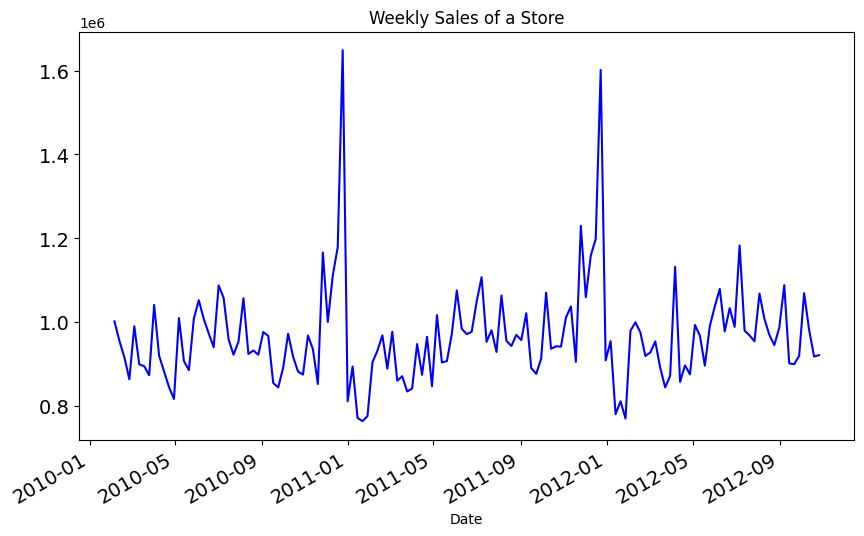

In [159]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

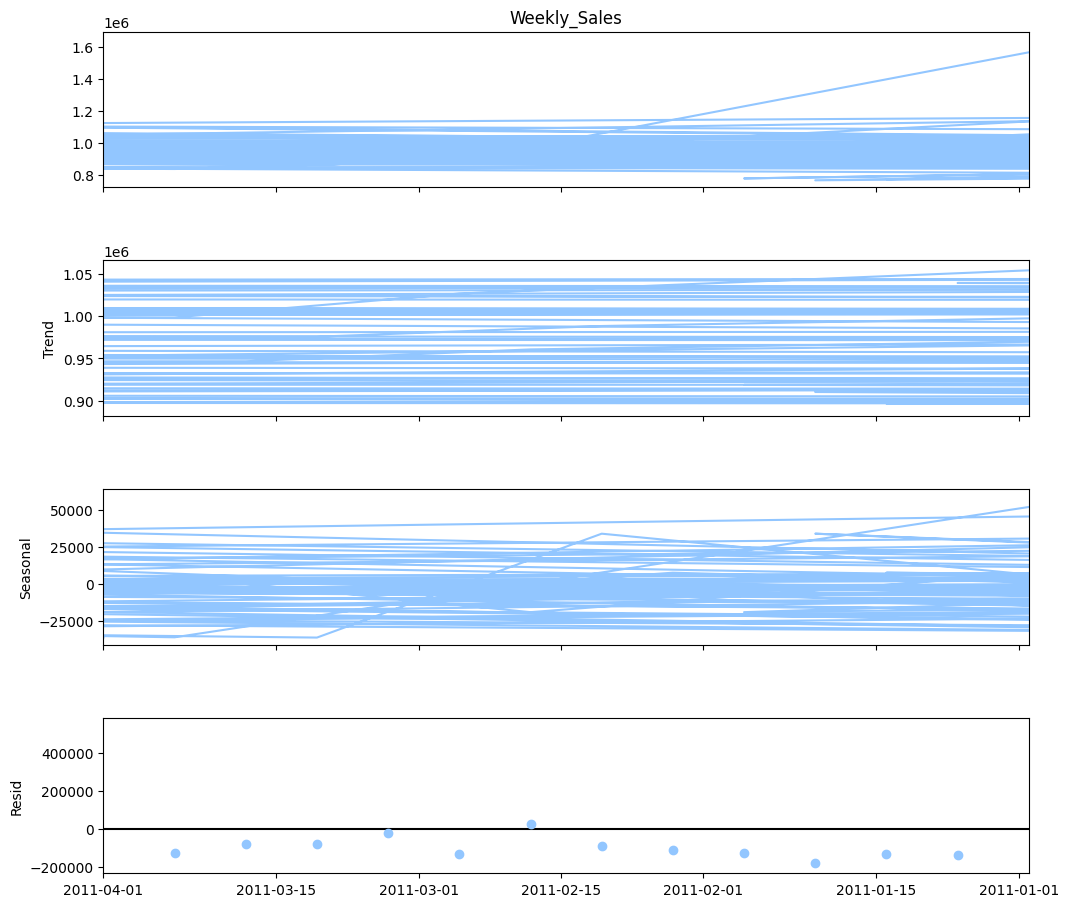

In [160]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [161]:
store5 = data1[data1.Store == 5]
# there are about 45 different stores in this dataset.

sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())

In [162]:
print(sales5)

            Weekly_Sales
Date                    
01-04-2011     314316.55
01-06-2012     359867.80
01-07-2011     327093.89
01-10-2010     283178.12
02-03-2012     359206.21
...                  ...
30-07-2010     268929.03
30-09-2011     292315.38
30-12-2011     349624.88
31-08-2012     344642.01
31-12-2010     298180.18

[143 rows x 1 columns]


In [163]:
sales5.index = pd.to_datetime(sales5.index, dayfirst=True)

In [164]:
sales5.reset_index(inplace=True)

In [165]:
sales5['Date'] = pd.to_datetime(sales5['Date'])
sales5.set_index('Date', inplace=True)


In [166]:


sales5.dtypes
# Grouped weekly sales by store 6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales5.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales5['Date'] = pd.to_datetime(sales5['Date'])
# resetting date back to the index
sales5.set_index('Date',inplace = True)

In [167]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

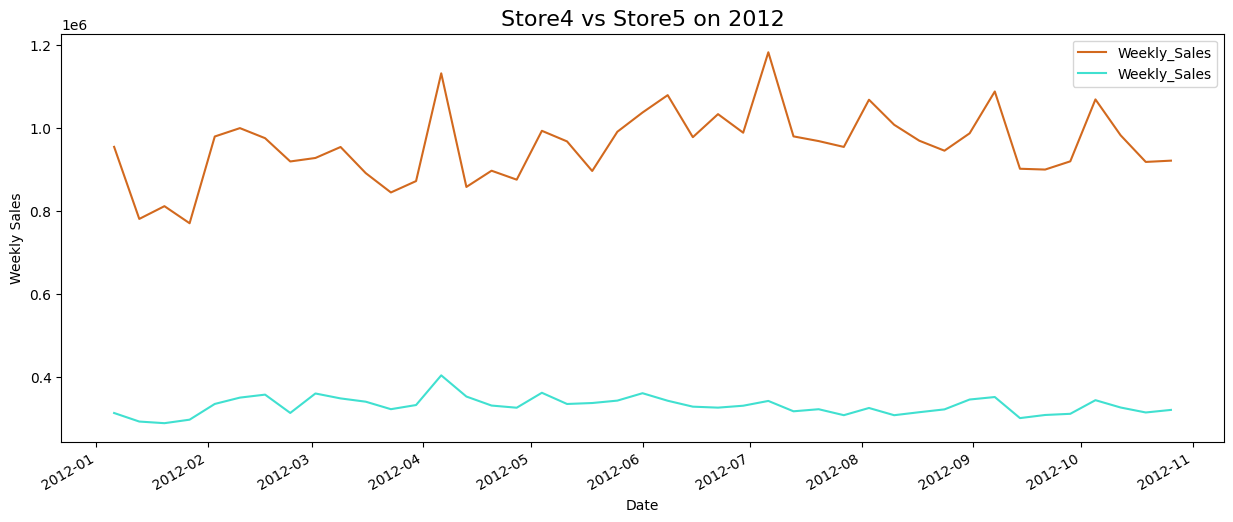

In [168]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store5 on 2012', fontsize = '16')
plt.show()

In [169]:
# Clearly we can see the irregularities

In [170]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [171]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1715      0.342     -3.426      0.001      -1.842      -0.501
ar.L2         -0.9727      0.440     -2.210      0.027      -1.835      -0.110
ar.L3         -0.6739      0.334     -2.019      0.043      -1.328      -0.020
ar.L4         -0.5343      0.169     -3.159      0.002      -0.866      -0.203
ma.L1         -2.0431      0.366     -5.579      0.000      -2.761      -1.325
ma.L2          1.1310      0.746      1.516      0.129      -0.331       2.593
ma.L3         -0.0831      0.422     -0.197      0.844      -0.909       0.743
ar.S.L52      -0.2048      0.176     -1.166      0.243      -0.549       0.139
sigma2      5.846e+10   1.14e-11   5.14e+21      0.000    5.85e+10    5.85e+10


<ipython-input-172-0b2061516065>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


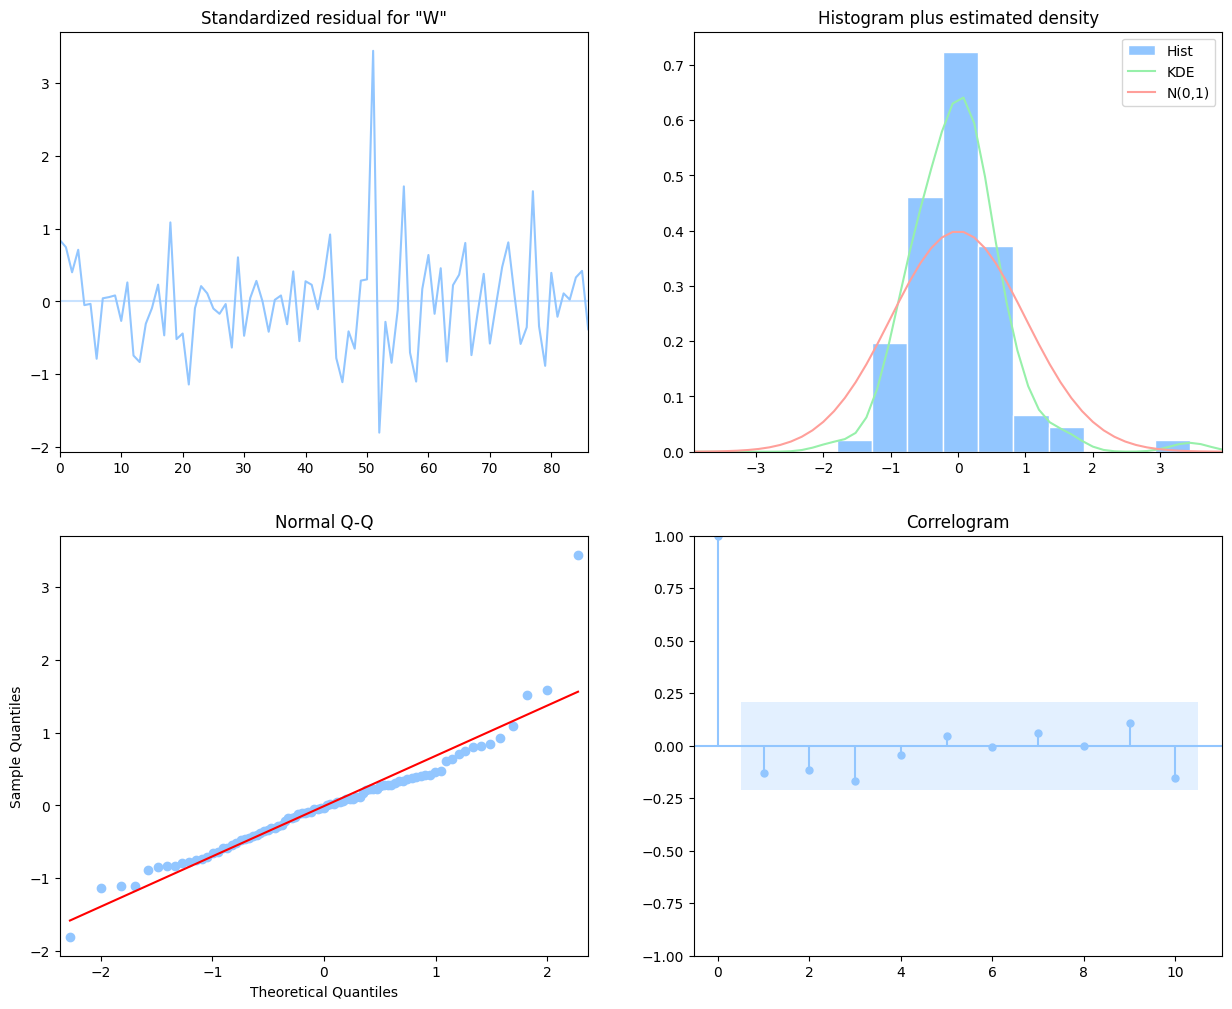

In [172]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [173]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

In [174]:
if '2010' in y1.index:
    print("Found '2010' in the index")
else:
    print("'2010' not found in the index. Please check the available dates.")

Found '2010' in the index


In [175]:
# Check if your index is monotonic increasing
if not y1.index.is_monotonic_increasing:
    print("Index is not monotonic increasing. Sorting the index.")
    y1 = y1.sort_index()

Index is not monotonic increasing. Sorting the index.


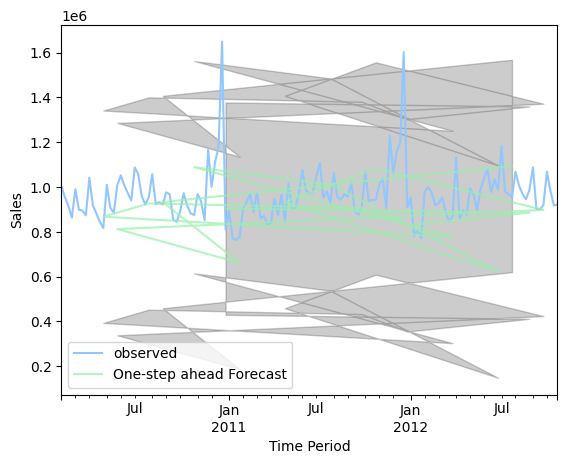

In [176]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [177]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10105917677.08


In [178]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


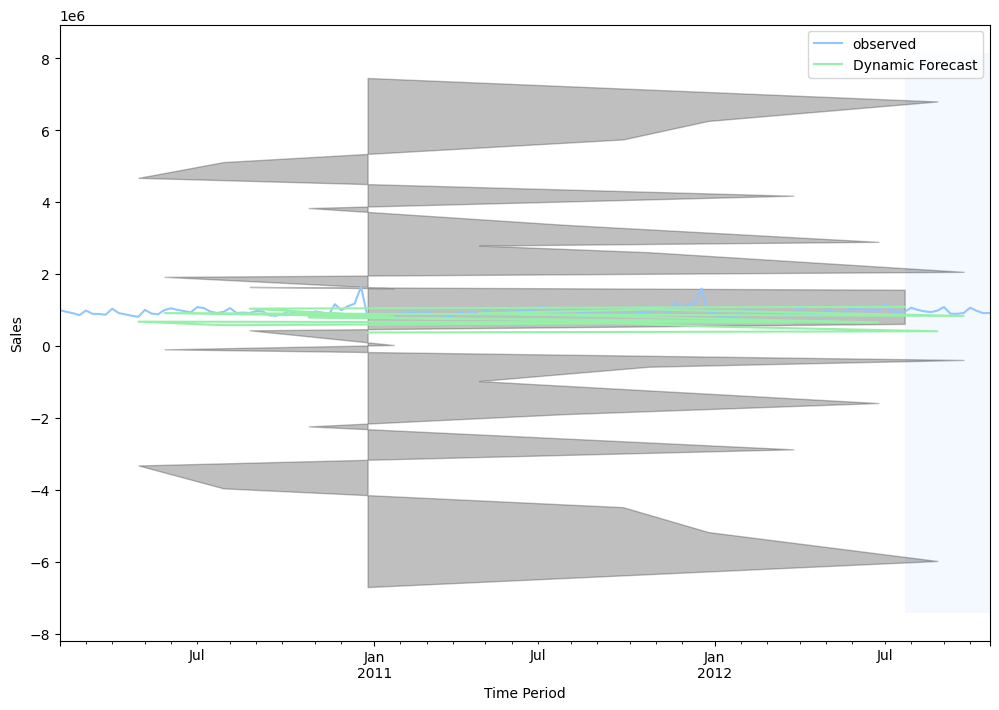

In [179]:


ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()



In [180]:

# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    1.094161e+06
2010-08-27    1.043006e+06
2011-01-28    8.192788e+05
2010-05-28    9.192006e+05
2012-09-28    8.412355e+05
2011-10-28    1.020182e+06
2011-04-29    9.127178e+05
2012-06-29    6.595230e+05
2011-07-29    7.419992e+05
2010-10-29    8.045301e+05
2012-03-30    6.573179e+05
2010-04-30    6.814305e+05
2010-07-30    5.822137e+05
2011-09-30    6.354638e+05
2011-12-30    5.467111e+05
2012-08-31    4.148906e+05
2010-12-31    3.791637e+05
Name: predicted_mean, dtype: float64


In [181]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-07-27     954396.85
2012-08-03    1068346.76
2012-08-10    1007906.43
2012-08-17     969387.48
2012-08-24     945318.47
2012-08-31     987264.67
2012-09-07    1088248.40
2012-09-14     901709.82
2012-09-21     899768.40
2012-09-28     919595.44
2012-10-05    1069112.00
2012-10-12     982523.26
2012-10-19     918170.50
2012-10-26     921264.52
Name: Weekly_Sales, dtype: float64


In [182]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 343164.82


In [183]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 790497.7666419001


# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


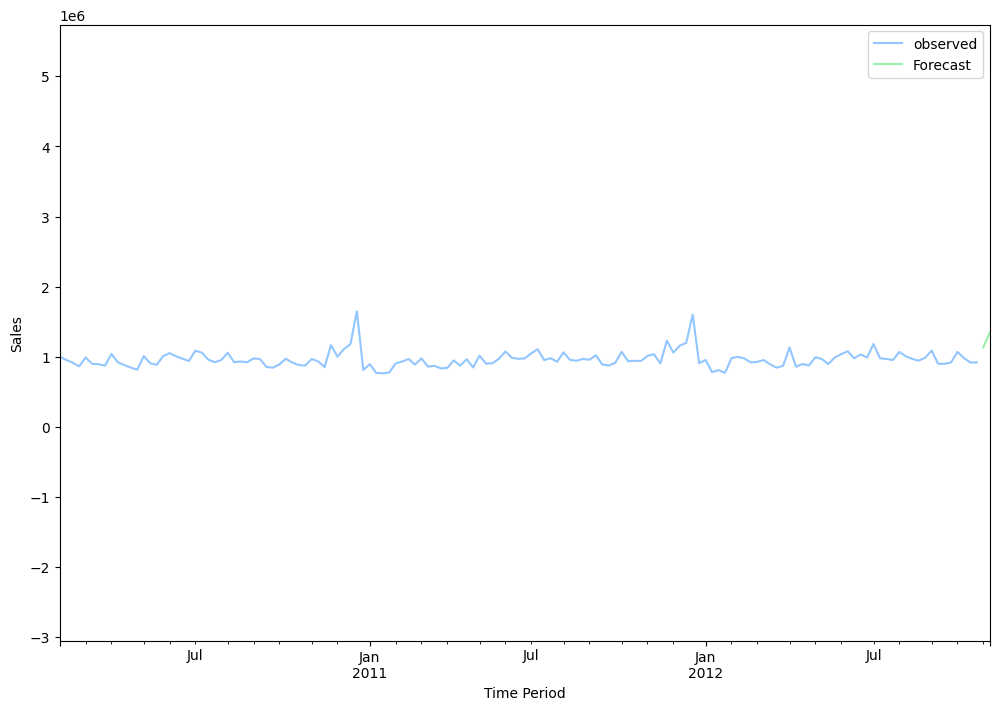

In [184]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

# Ensure the index of y1 is in datetime format
y1.index = pd.to_datetime(y1.index)

# Convert the pred_ci index from Unix timestamps to datetime
pred_ci.index = pd.to_datetime(pred_ci.index, unit='ns')

# Create a date range that matches the length of pred_uc.predicted_mean
date_range = pd.date_range(start=y1.index[-1] + pd.Timedelta(days=1), periods=len(pred_uc.predicted_mean), freq='D')

# Extract predicted_mean and set its index to the created date range
predicted_mean = pred_uc.predicted_mean
predicted_mean.index = date_range

# Plot the observed data
ax = y1.plot(label='observed', figsize=(12, 8))

# Plot the forecasted data
predicted_mean.plot(ax=ax, label='Forecast')

# Plot the confidence intervals
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

# Set labels and show legend
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()
plt.show()


In [185]:
data = sales5.copy()
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'])
print(data.head(5))
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week


        Date  Weekly_Sales
0 2011-04-01     314316.55
1 2012-06-01     359867.80
2 2011-07-01     327093.89
3 2010-10-01     283178.12
4 2012-03-02     359206.21


In [186]:
data.head(10)

,Date,Weekly_Sales,Year,Month,Week
0,2011-04-01,314316.55,2011,4,13
1,2012-06-01,359867.80,2012,6,22
2,2011-07-01,327093.89,2011,7,26
3,2010-10-01,283178.12,2010,10,39
4,2012-03-02,359206.21,2012,3,9
5,2010-04-02,331406.00,2010,4,13
6,2010-07-02,305993.27,2010,7,26
7,2011-09-02,315645.53,2011,9,35
8,2011-12-02,376225.61,2011,12,48
9,2012-02-03,333948.00,2012,2,5


In [187]:


# Load the dataset
data = pd.read_csv('Walmart DataSet.csv')


# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Display basic information
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None
             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:

In [188]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

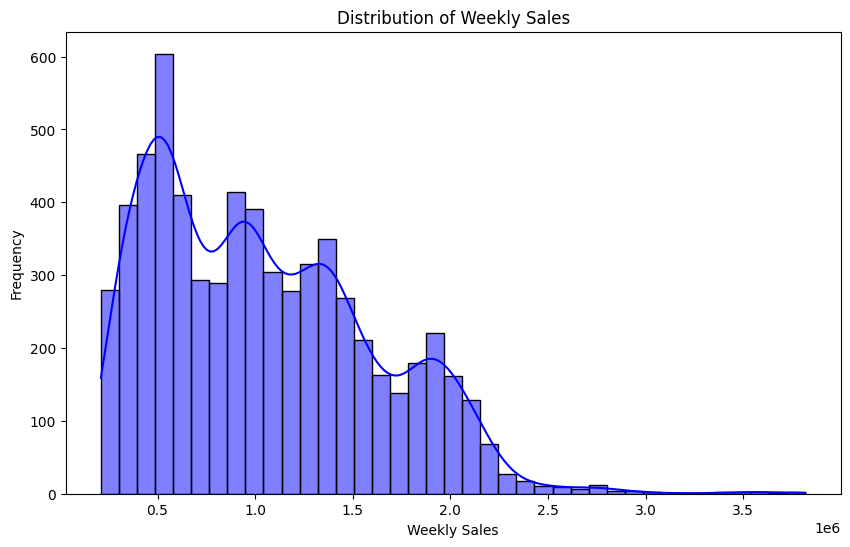

In [189]:

# Distribution of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], kde=True, color='blue')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()



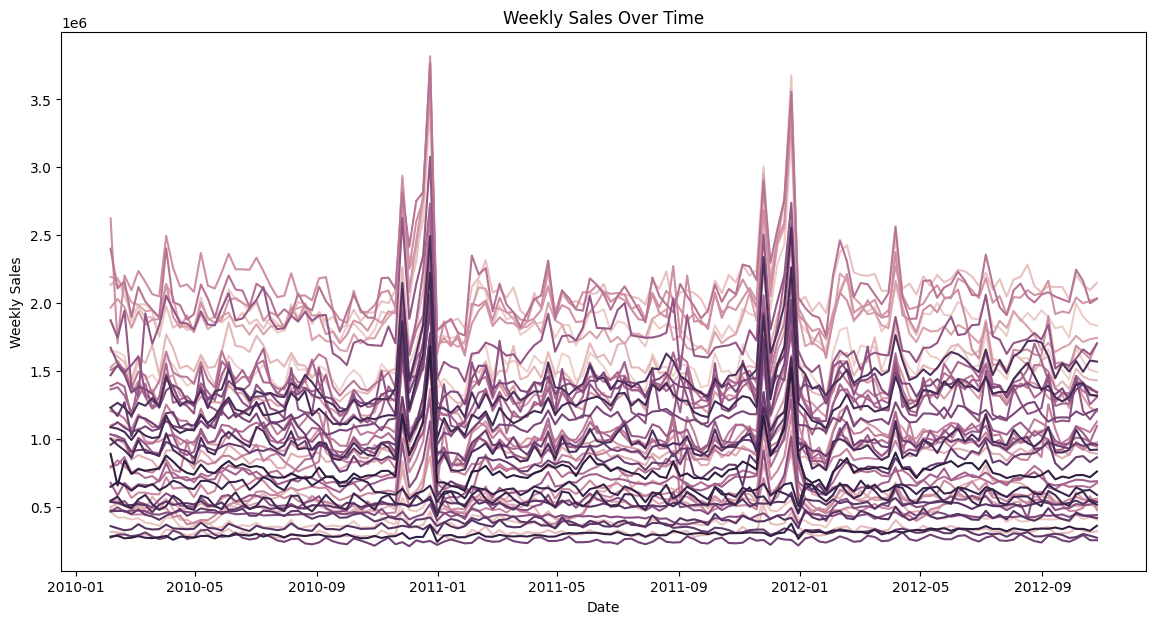

In [190]:
# Weekly Sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Date', y='Weekly_Sales', hue='Store', legend=None)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


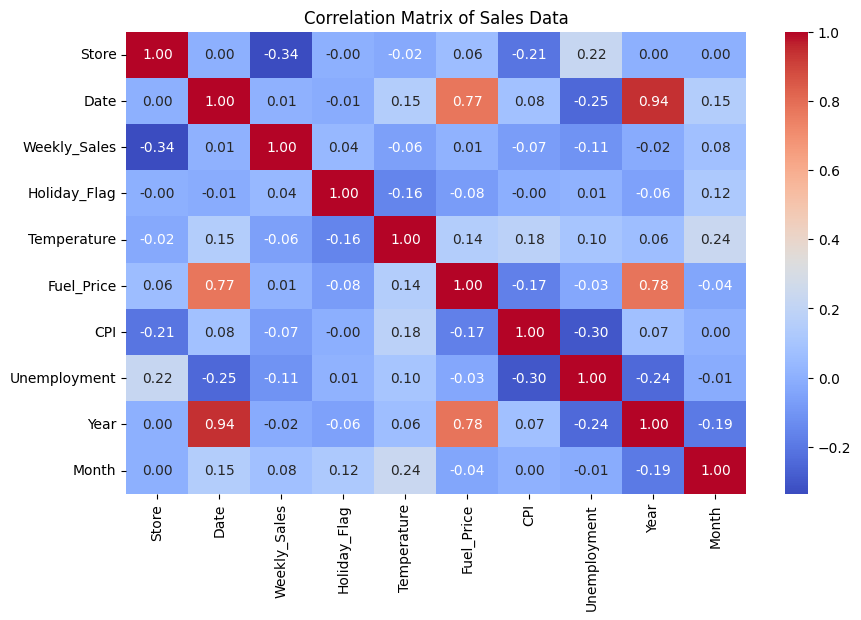

In [191]:
# Correlation matrix to understand relationships
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sales Data')
plt.show()


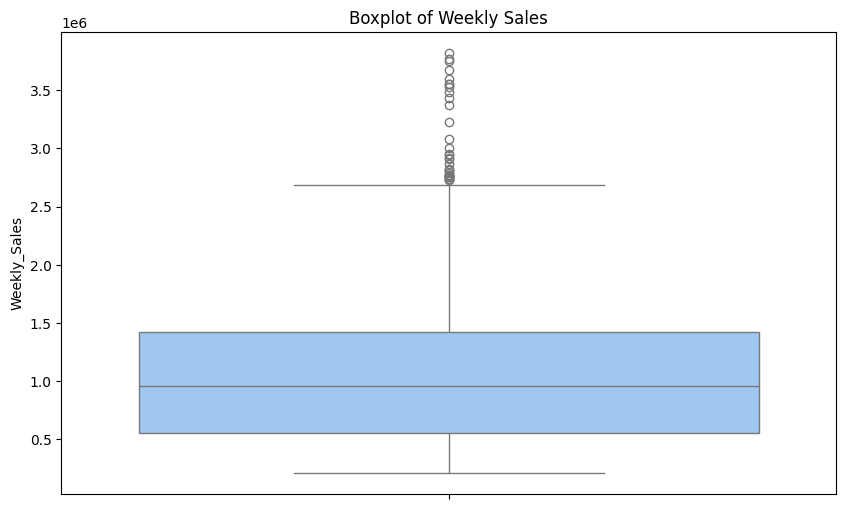

In [192]:
# Boxplot for detecting outliers in Weekly Sales
plt.figure(figsize=(10, 6))
sns.boxplot(data['Weekly_Sales'])
plt.title('Boxplot of Weekly Sales')
plt.show()


# 1 a. Effect of Unemployment on Weekly Sales

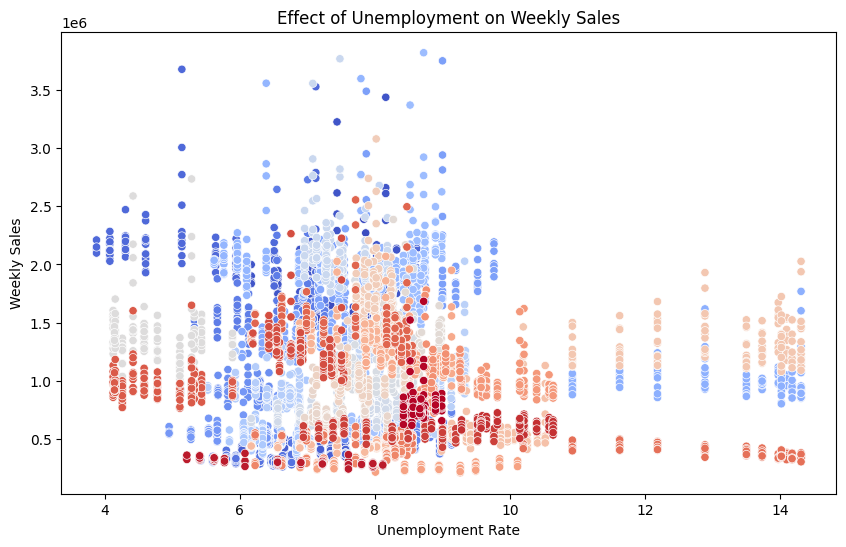

Correlation between Unemployment and Weekly Sales by Store:
 Store
1    -0.097955
2     0.066325
3    -0.230413
4    -0.337015
5    -0.207043
6     0.044251
7    -0.165382
8    -0.052580
9    -0.191534
10    0.131908
11   -0.020339
12   -0.009286
13   -0.171633
14    0.210786
15    0.078905
16   -0.070864
17   -0.263600
18    0.139179
19    0.101464
20   -0.095341
21    0.218367
22    0.039043
23   -0.077169
24   -0.012261
25   -0.004958
26   -0.066899
27   -0.014275
28    0.136671
29    0.084682
30    0.201862
31   -0.064738
32   -0.099455
33    0.101175
34    0.017010
35    0.483865
36    0.833734
37   -0.221287
38   -0.785290
39   -0.384681
40   -0.112528
41   -0.350630
42   -0.356355
43   -0.201954
44   -0.780076
45   -0.004041
Name: (Weekly_Sales, Unemployment), dtype: float64

Stores most negatively affected by unemployment:
 Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
4    -0.337015
17   -0.263600
3    -0.230413
37   -0.221287
5    -0.207043


In [193]:
# Effect of Unemployment on Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Unemployment', y='Weekly_Sales', hue='Store', palette='coolwarm', legend=None)
plt.title('Effect of Unemployment on Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

# Store-wise analysis for unemployment effect
unemployment_sales = data.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack().iloc[:,1]
print("Correlation between Unemployment and Weekly Sales by Store:\n", unemployment_sales)

# Identifying stores most affected by unemployment
most_affected_stores = unemployment_sales[unemployment_sales < 0].sort_values()
print("\nStores most negatively affected by unemployment:\n", most_affected_stores)


# 1 b. Seasonal Trend in Weekly Sales

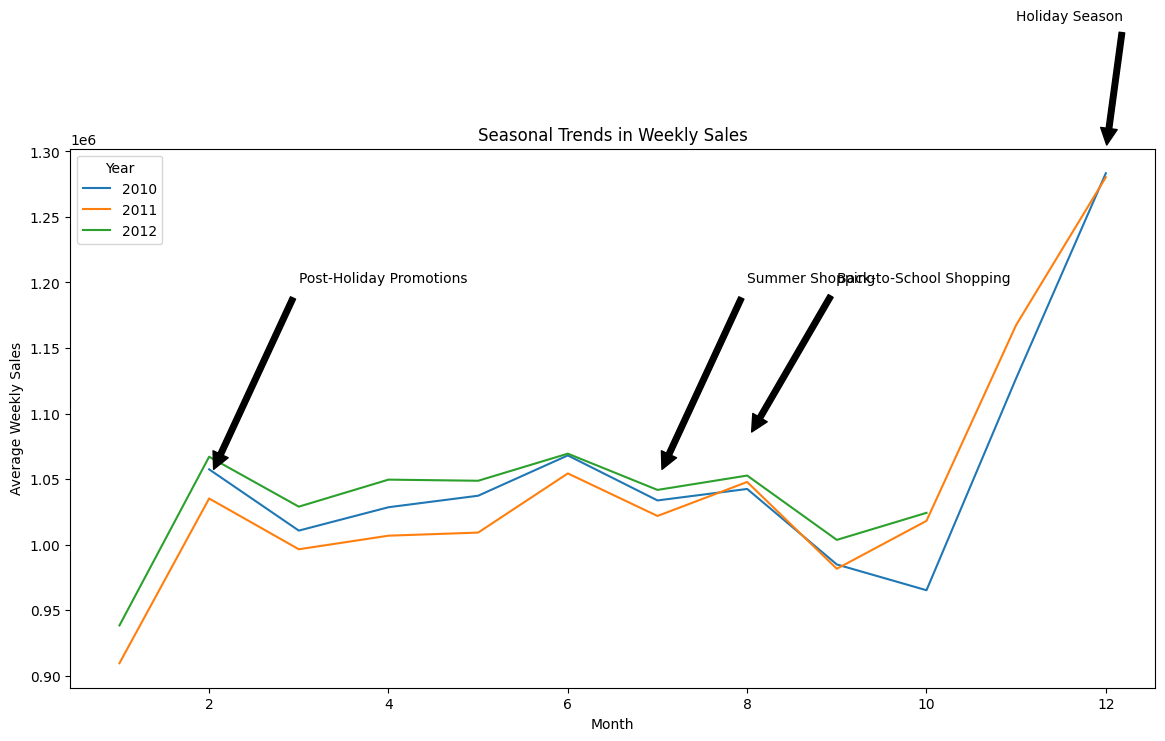

In [194]:


monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()

# Plotting the seasonal trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', palette='tab10')

# Annotating the plot
plt.title('Seasonal Trends in Weekly Sales')

# Adding annotations for key points
plt.annotate('Post-Holiday Promotions', xy=(2, 1.05e6), xytext=(3, 1.2e6),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Summer Shopping', xy=(7, 1.05e6), xytext=(8, 1.2e6),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Back-to-School Shopping', xy=(8, 1.08e6), xytext=(9, 1.2e6),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Holiday Season', xy=(12, 1.3e6), xytext=(11, 1.4e6),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Customizing labels
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')

# Display the plot
plt.show()


# 1 c. Effect of Temperature on Weekly Sales

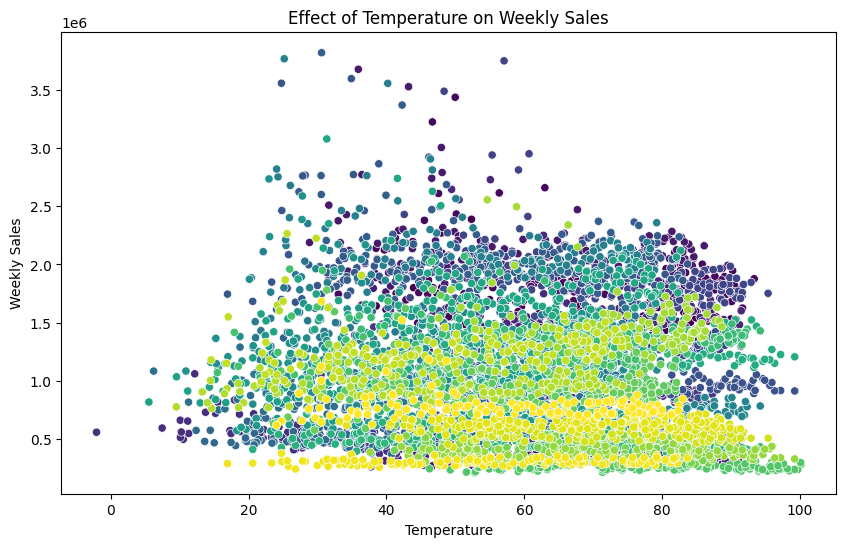

In [195]:
# Scatter plot for Temperature vs Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Temperature', y='Weekly_Sales', hue='Store', palette='viridis', legend=None)
plt.title('Effect of Temperature on Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()


In [196]:
# Calculate overall correlation between Temperature and Weekly Sales
corr_overall = data['Temperature'].corr(data['Weekly_Sales'])
print(f"Overall correlation between Temperature and Weekly Sales: {corr_overall:.2f}")

# Determine if temperature significantly affects sales
if abs(corr_overall) > 0.3:  # Assuming a threshold of 0.3 for significance
    print("Yes, temperature affects weekly sales.")
else:
    print("No, temperature does not significantly affect weekly sales.")

Overall correlation between Temperature and Weekly Sales: -0.06
No, temperature does not significantly affect weekly sales.


In [197]:
# Calculate correlation store-wise (optional)
corr_storewise = data.groupby('Store')[['Temperature', 'Weekly_Sales']].corr().unstack().iloc[:,1]
print("Correlation between Temperature and Weekly Sales by Store:\n", corr_storewise)

Correlation between Temperature and Weekly Sales by Store:
 Store
1    -0.222701
2    -0.297673
3    -0.377524
4    -0.225583
5    -0.175517
6    -0.084863
7     0.015077
8    -0.312324
9    -0.208343
10   -0.432569
11   -0.278503
12   -0.379416
13   -0.137746
14   -0.199851
15   -0.050541
16    0.182948
17    0.081012
18   -0.144278
19   -0.080805
20   -0.264983
21   -0.177084
22   -0.082892
23    0.056257
24    0.111833
25   -0.031311
26    0.211722
27    0.121809
28   -0.376506
29   -0.129144
30   -0.330816
31   -0.262192
32   -0.111681
33    0.019244
34   -0.278523
35    0.043392
36   -0.094454
37   -0.300493
38    0.032993
39    0.064738
40    0.090598
41    0.106761
42   -0.151639
43    0.095272
44    0.267822
45   -0.201945
Name: (Temperature, Weekly_Sales), dtype: float64


# 1 d. How is the Consumer Price index affecting the weekly sales of various stores?

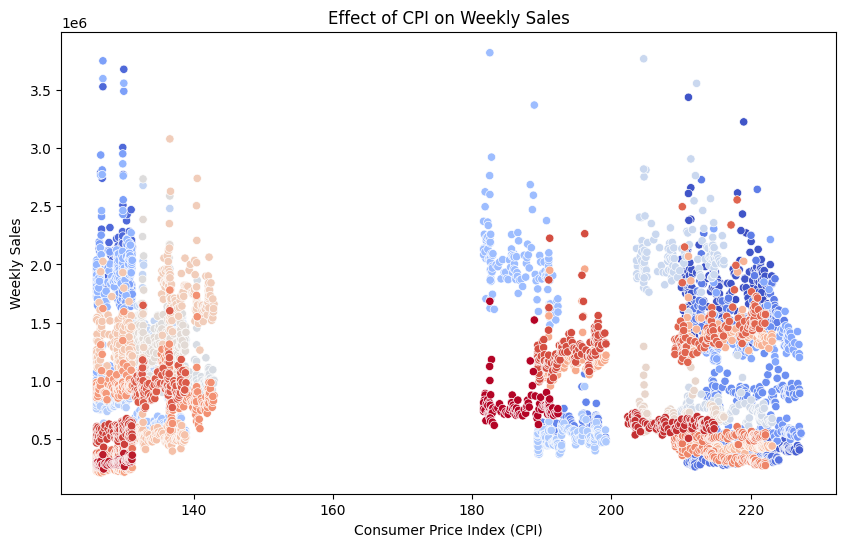

Overall correlation between CPI and Weekly Sales: -0.07
Correlation between CPI and Weekly Sales by Store:
 Store
1     0.225408
2    -0.062431
3     0.317250
4     0.351157
5     0.308261
6    -0.011357
7     0.289044
8     0.120255
9     0.294805
10   -0.115374
11    0.069781
12    0.084087
13    0.163976
14   -0.419755
15   -0.174467
16    0.124285
17    0.348571
18   -0.193541
19   -0.155341
20    0.058706
21   -0.163649
22   -0.038602
23    0.084248
24   -0.013684
25   -0.010914
26    0.131980
27   -0.213082
28   -0.095908
29   -0.072530
30   -0.298188
31    0.132887
32    0.196782
33   -0.052271
34    0.115437
35   -0.424107
36   -0.915095
37    0.244507
38    0.812837
39    0.428043
40    0.113318
41    0.392293
42    0.360859
43   -0.285686
44    0.740150
45   -0.023548
Name: (CPI, Weekly_Sales), dtype: float64


In [198]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='CPI', y='Weekly_Sales', hue='Store', palette='coolwarm', legend=None)
plt.title('Effect of CPI on Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.show()

# Calculate overall correlation between CPI and Weekly Sales
corr_overall_cpi = data['CPI'].corr(data['Weekly_Sales'])
print(f"Overall correlation between CPI and Weekly Sales: {corr_overall_cpi:.2f}")

# Store-wise correlation between CPI and Weekly Sales
corr_storewise_cpi = data.groupby('Store')[['CPI', 'Weekly_Sales']].corr().unstack().iloc[:,1]
print("Correlation between CPI and Weekly Sales by Store:\n", corr_storewise_cpi)


In [199]:
# Interpretation of overall CPI effect
if abs(corr_overall_cpi) > 0.3:  # Assuming a threshold of 0.3 for significance
    print("Yes, CPI significantly affects weekly sales.")
else:
    print("No, CPI does not significantly affect weekly sales.")

No, CPI does not significantly affect weekly sales.


# 1 e. Top performing stores according to the historical data.

In [200]:
store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Rank the stores based on total sales
top_performing_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False).reset_index(drop=True)

# Display the top 5 performing stores
print(top_performing_stores.head())

   Store  Weekly_Sales
0     20  3.013978e+08
1      4  2.995440e+08
2     14  2.889999e+08
3     13  2.865177e+08
4      2  2.753824e+08


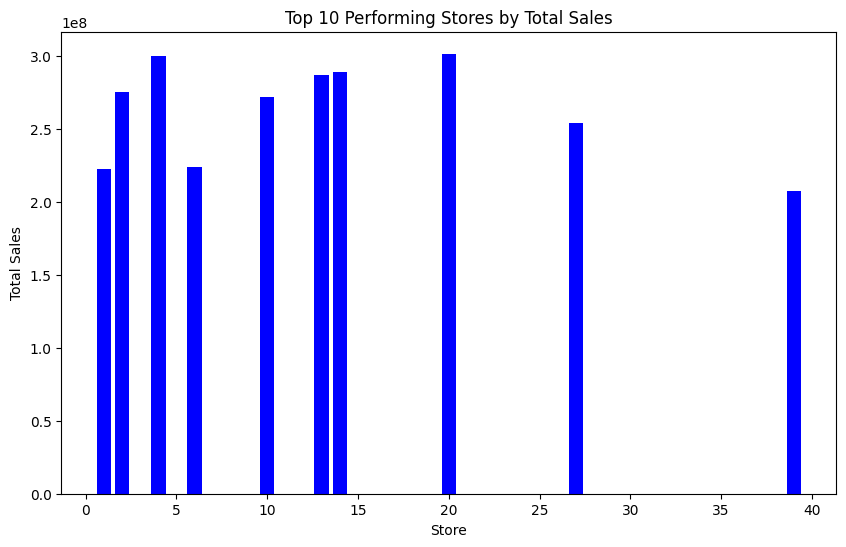

In [201]:
# Plot the top 10 performing stores
plt.figure(figsize=(10, 6))
plt.bar(top_performing_stores['Store'].head(10), top_performing_stores['Weekly_Sales'].head(10), color='blue')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Top 10 Performing Stores by Total Sales')
plt.show()

# 1 f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [202]:
store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Identify the highest and lowest performing stores
highest_performing_store = store_sales.loc[store_sales['Weekly_Sales'].idxmax()]
lowest_performing_store = store_sales.loc[store_sales['Weekly_Sales'].idxmin()]

# Calculate the difference between the highest and lowest performing stores
difference = highest_performing_store['Weekly_Sales'] - lowest_performing_store['Weekly_Sales']

# Display the results
print(f"Highest Performing Store: Store {highest_performing_store['Store']} with total sales of ${highest_performing_store['Weekly_Sales']:.2f}")
print(f"Worst Performing Store: Store {lowest_performing_store['Store']} with total sales of ${lowest_performing_store['Weekly_Sales']:.2f}")
print(f"Difference between the highest and lowest performing stores: ${difference:.2f}")

Highest Performing Store: Store 20.0 with total sales of $301397792.46
Worst Performing Store: Store 33.0 with total sales of $37160221.96
Difference between the highest and lowest performing stores: $264237570.50
